# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [11]:
# Write your code here
from tabulate import tabulate
import re
import csv


def preprocessText(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def generateNgrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def countNgrams(texts, n):
    ngramCounts = {}
    for text in texts:
        text = preprocessText(text)
        ngrams = generateNgrams(text, n)
        for ngram in ngrams:
            if ngram in ngramCounts:
                ngramCounts[ngram] += 1
            else:
                ngramCounts[ngram] = 1
    return ngramCounts

def calculateBigramProbabilities(texts):
    bigramProbabilities = {}
    unigramCounts = countNgrams(texts, 1)
    bigramCounts = countNgrams(texts, 2)
    for bigram, count in bigramCounts.items():
        w1, w2 = bigram.split()
        probability = count / unigramCounts[w2]
        bigramProbabilities[bigram] = probability
    return bigramProbabilities

def extractNounPhrases(text):
    # Placeholder function, you may replace it with a more sophisticated noun phrase extraction method
    return re.findall(r'\b(?:noun|phrase)\b', text)

def calculateRelativeProbabilities(texts):
    nounPhraseProbabilities = {}
    maxNounPhraseFrequency = 0
    for text in texts:
        nounPhrases = extractNounPhrases(text)
        for nounPhrase in nounPhrases:
            if nounPhrase in nounPhraseProbabilities:
                nounPhraseProbabilities[nounPhrase] += 1
            else:
                nounPhraseProbabilities[nounPhrase] = 1
            if nounPhraseProbabilities[nounPhrase] > maxNounPhraseFrequency:
                maxNounPhraseFrequency = nounPhraseProbabilities[nounPhrase]

    # Normalize probabilities
    for nounPhrase, frequency in nounPhraseProbabilities.items():
        nounPhraseProbabilities[nounPhrase] /= maxNounPhraseFrequency

    return nounPhraseProbabilities

def loadColumnFromCsv(filename, columnName):
    columnData = []
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if columnName in row:
                columnData.append(row[columnName])
            else:
                print(f"Warning: Column '{columnName}' not found in the CSV file.")
    return columnData

# Load a specific column from CSV file by column name
filename = 'movie_reviews.csv'  # Replace 'your_dataset.csv' with your CSV file name
columnName = 'Review'  # Replace 'your_column_name' with the name of the column you want to load
dataset = loadColumnFromCsv(filename, columnName)

# Task 1: Count the frequency of all the N-grams (N=3)
ngramCounts = countNgrams(dataset, 3)
print("N-gram frequencies:")
for ngram, count in ngramCounts.items():
    print(f"{ngram}: {count}")

# Task 2: Calculate the probabilities for all the bigrams in the dataset
bigramProbabilities = calculateBigramProbabilities(dataset)
print("\nBigram probabilities:")
for bigram, probability in bigramProbabilities.items():
    print(f"{bigram}: {probability}")

# Task 3: Extract all the noun phrases and calculate relative probabilities
nounPhraseProbabilities = calculateRelativeProbabilities(dataset)
tableData = []
for i, review in enumerate(dataset[:100]):
    nounProb = nounPhraseProbabilities.get('noun', 0)
    phraseProb = nounPhraseProbabilities.get('phrase', 0)
    # Truncate the review text if it's too long
    truncatedReview = (review[:50] + '...') if len(review) > 50 else review
    tableData.append([ truncatedReview, nounProb, phraseProb])

# Print table
print(tabulate(tableData, headers=["Review", "Noun Probability", "Phrase Probability"], tablefmt="grid"))


Streaming output truncated to the last 5000 lines.
ending scene: 0.1111111111111111
scene was: 0.0196078431372549
was amazing: 0.25
amazing all: 0.02857142857142857
i would: 0.1
would go: 0.16666666666666666
go as: 0.011235955056179775
as far: 0.3333333333333333
far as: 0.011235955056179775
say its: 0.013333333333333334
its the: 0.0017985611510791368
most boring: 0.25
boring christopher: 0.0625
nolan movie: 0.04
but it: 0.03676470588235294
a very: 0.10344827586206896
very good: 0.06666666666666667
movie lets: 1.0
lets leave: 0.3333333333333333
leave it: 0.007352941176470588
it at: 0.023255813953488372
at that: 0.00980392156862745
i still: 0.1111111111111111
still give: 0.16666666666666666
give the: 0.0035971223021582736
movie an: 0.022727272727272728
an 8: 1.0
i may: 0.25
may consider: 0.5
consider myself: 1.0
myself lucky: 1.0
lucky to: 0.0047169811320754715
be alive: 1.0
alive to: 0.0047169811320754715
to watch: 0.375
watch christopher: 0.0625
nolan works: 0.25
works which: 0.04
whic

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [12]:
# Write your code here
import re
import math
import csv

def preprocessText(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def calculateTermFrequency(document):
    termFrequency = {}
    words = document.split()
    totalWords = len(words)
    for word in words:
        termFrequency[word] = termFrequency.get(word, 0) + 1
    for word, freq in termFrequency.items():
        termFrequency[word] = freq / totalWords
    return termFrequency

def calculateInverseDocumentFrequency(documents):
    inverseDocumentFrequency = {}
    totalDocuments = len(documents)
    for document in documents:
        words = set(document.split())
        for word in words:
            inverseDocumentFrequency[word] = inverseDocumentFrequency.get(word, 0) + 1
    for word, freq in inverseDocumentFrequency.items():
        inverseDocumentFrequency[word] = math.log10(totalDocuments / (freq + 1))
    return inverseDocumentFrequency

def calculateTfIdfVector(document, idf):
    tf = calculateTermFrequency(document)
    tfIdfVector = {}
    for word, freq in tf.items():
        tfIdfVector[word] = freq * idf.get(word, 0)
    return tfIdfVector

def calculateCosineSimilarity(vector1, vector2):
    dotProduct = sum(vector1[word] * vector2.get(word, 0) for word in vector1)
    magnitude1 = math.sqrt(sum(vector1[word]**2 for word in vector1))
    magnitude2 = math.sqrt(sum(vector2[word]**2 for word in vector2))
    return dotProduct / (magnitude1 * magnitude2)

def loadDataFromCsv(filename, authorColumn='Author', reviewColumn='Review'):
    data = []
    with open(filename, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if authorColumn in row and reviewColumn in row:
                data.append((row[authorColumn], row[reviewColumn]))
            else:
                print(f"Warning: Columns '{authorColumn}' and/or '{reviewColumn}' not found in the CSV file.")
    return data

# Load data from CSV file
filename = 'movie_reviews.csv'  # Replace with your CSV file containing 'Author' and 'Review' columns
data = loadDataFromCsv(filename)

# Define the query
query = "An Outstanding movie with a haunting performance and best character development"
preprocessedQuery = preprocessText(query)

# Preprocess the reviews
preprocessedReviews = [preprocessText(review) for _, review in data]

# Calculate IDF for all terms
idf = calculateInverseDocumentFrequency(preprocessedReviews)

# Calculate TF-IDF vector for query
queryTfidf = calculateTfIdfVector(preprocessedQuery, idf)

# Calculate cosine similarity between query and each review
cosineSimilarities = []
for i, (_, review) in enumerate(data):
    reviewTfidf = calculateTfIdfVector(preprocessedReviews[i], idf)
    similarity = calculateCosineSimilarity(queryTfidf, reviewTfidf)
    cosineSimilarities.append((i+1, similarity))

# Sort the reviews based on cosine similarity
cosineSimilarities.sort(key=lambda x: x[1], reverse=True)

# Write ranked reviews to a new CSV file since the output is too large to display
outputFilename = 'ranked_reviews.csv'
with open(outputFilename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Rank', 'Author', 'Review']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for rank, (index, similarity) in enumerate(cosineSimilarities, start=1):
        writer.writerow({'Rank': rank, 'Author': data[index-1][0], 'Review': data[index-1][1]})

print(f"Ranked reviews written to '{outputFilename}' successfully.")


Ranked reviews written to 'ranked_reviews.csv' successfully.


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Word2Vec model trained and saved successfully.


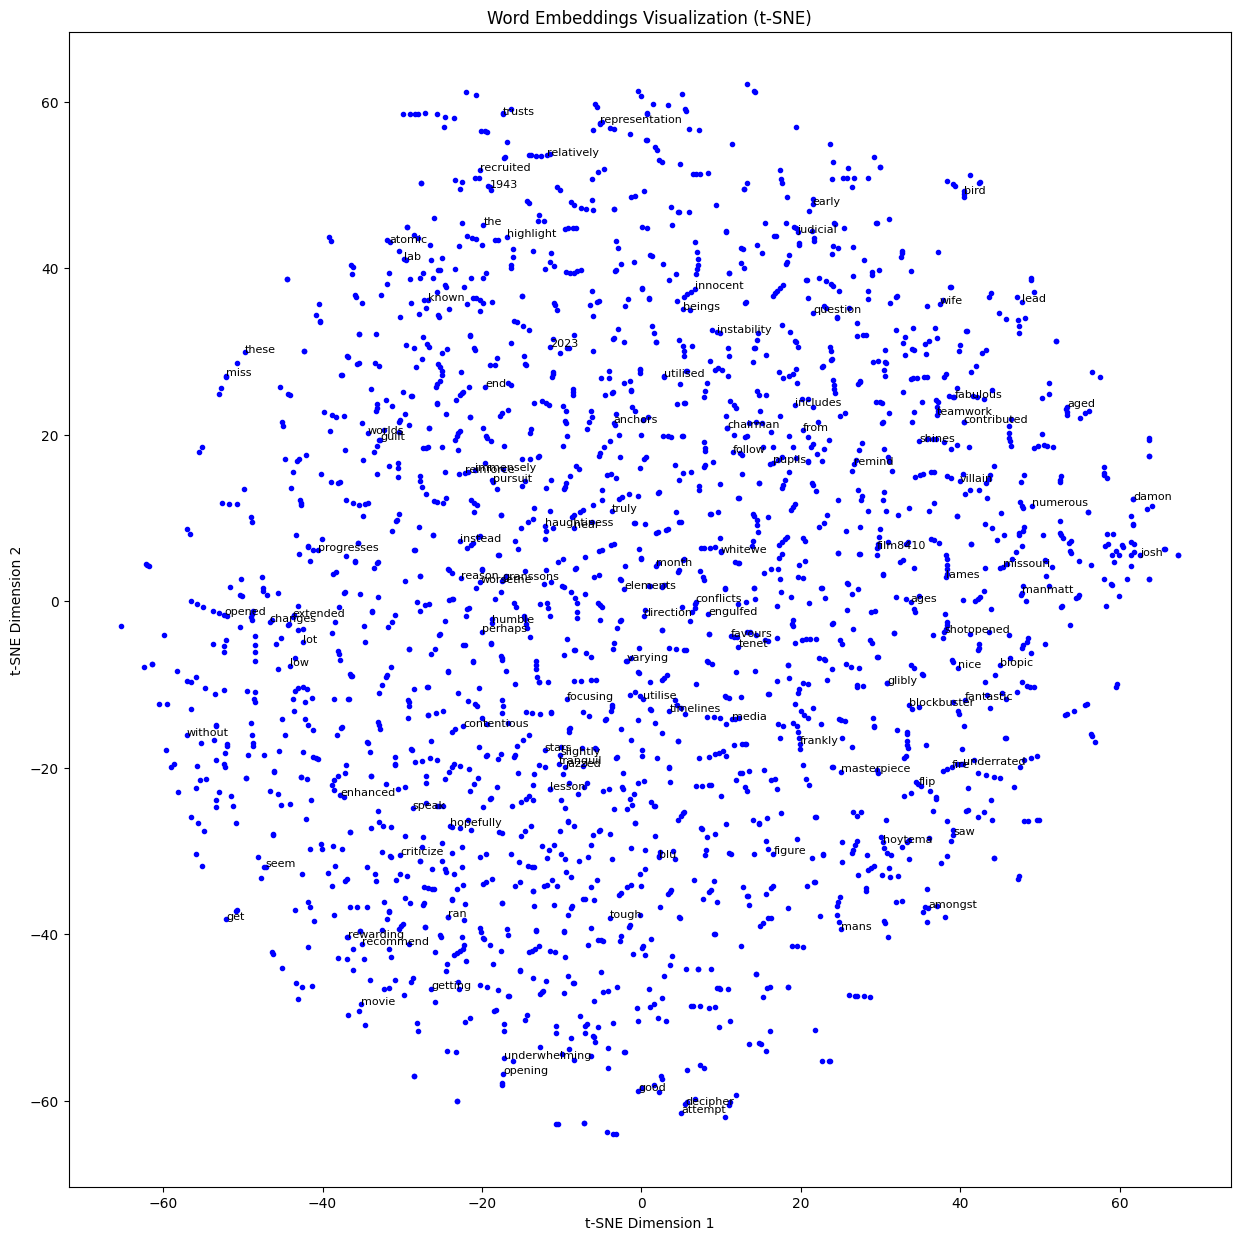

In [19]:
# Write your code here
import re
import csv
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def preprocessText(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Load data from CSV file
def loadDataFromCsv(filename, reviewColumn='Review'):
    reviews = []
    with open(filename, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if reviewColumn in row:
                reviews.append(row[reviewColumn])
            else:
                print(f"Warning: Column '{reviewColumn}' not found in the CSV file.")
    return reviews

# Load reviews from CSV file
filename = 'movie_reviews.csv'
reviews = loadDataFromCsv(filename)

# Preprocess reviews
preprocessedReviews = [preprocessText(review) for review in reviews]

# Train Word2Vec model
vectorSize = 300  # Dimensionality of the word vectors
windowSize = 5    # Maximum distance between the current and predicted word within a sentence
minCount = 1      # Ignores all words with total frequency lower than this
workers = 4       # Number of CPU cores to use for training the model

# Train Word2Vec model
word2vecModel = Word2Vec(sentences=[review.split() for review in preprocessedReviews],
                         vector_size=vectorSize, window=windowSize, min_count=minCount, workers=workers)

# Save the trained model
word2vecModel.save('word2vec_model.bin')

print("Word2Vec model trained and saved successfully.")

# Visualize word embeddings
wordVectors = word2vecModel.wv.vectors
words = word2vecModel.wv.index_to_key

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
wordVectors2d = tsne.fit_transform(wordVectors)

# Visualize word embeddings
plt.figure(figsize=(15, 15))
plt.scatter(wordVectors2d[:, 0], wordVectors2d[:, 1], marker='.', color='b')

# Add annotations for some words
for i, word in enumerate(words):
    if i % 20 == 0:
        plt.annotate(word, xy=(wordVectors2d[i, 0], wordVectors2d[i, 1]), fontsize=8)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embeddings Visualization (t-SNE)')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/madhan444-s/Madhan_INFO5731_Spring2024/blob/main/movie_reviews_cleaned.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''The assignment pushed me to deepen my understanding of text processing and machine learning concepts like Word2Vec and t-SNE.
 I found training the Word2Vec model and visualizing word embeddings especially engaging and insightful.
'''